# Research on type of telecom prepaid plan and revenue

>Purpose: to analyze clients' behaviour and determine which prepaid plan brings in more revenue

# Summary

An investigation was conducted to analyze clients' behaviour and determine which prepaid plan brings in more revenue by studying data from the telecom operator Megaline.

There were no missing or duplicate values identified for the phone calls, text messaging, and internet usage datasets. The *churn_date* variable looked to be problematic since it would mean that the sample size gets decreased by 34 people. However, those people were not removed and whatever data was collected will be considered for analysis since it is likely that they paid for one of the two services during their enrollment.

Values of 0 for the phone calls and internet usage datasets exist and could indicate that a phone call was less than one minute in duration (since the telecom company measures call duration in minutes), and a value of 0 in the internet usage dataset (in megabytes) could indicate that the internet was not used at all; these values were still included in analysis for comparison with other services. Datasets that have object-type dates were converted to datetime-type, and the column *month* was created in the phone call, text messaging, and internet traffic datasets to determine the particular month a service event occurred for the respective services as well as plan to indicate the type of service plan a specific user has purchased. Additionally for the phone call dataset, the column *duration_rounded* was created to round up phone call duration per the telecom company guidelines. Web traffic is charged for the entire month and rounded up to the nearest gigabyte which is reflected in *gb_rounded* for the internet dataset. The individual services were then aggregated into one dataset in addition to the *users_data* in order to exhibit the specific users and their telecom plan where the certain columns were renamed for practicality. Upon merging the datasets by *user_id* and/or *month*, missing values were produced and logically replaced with 0. There were 10 value counts (10 user ID’s) in *month* where there was a missing value which coincidentally had missing values for *gb_used*, *texts*, *calls*, and *minutes* and was removed as a result. The monthly revenue (*revenue*) was then calculated per the respective telecom plans (Surf or Ultimate) according to the telecom company's guidelines.

Analysis was conducted on individual services (ie. phone call duration, text messages sent, and data usage) between Surf and Ultimate telecom plans and it was observed that on average, users from both Surf and Ultimate make phone calls that last around 430 minutes. There also seems to be more Ultimate users that utilize the phone call service than Surf users as well as a higher chance for an Ultimate user to make a phone call that is between 400-500 minutes compared to Surf users having phone calls that are between 300-450 minutes. Surf users on average send around 31 text messages and Ultimate users send around 38 text messages. There also seems to be more Ultimate users that utilize the text messaging service than Surf users and the data shows a higher chance for an Ultimate user to send between 0-20 text messages, and for Surf users there is a high chance people send between 0-25 text messages. As for internet usage, both Surf and Ultimate users use on average around 17 gb of data. There seems to be more Surf users than Ultimate users, however, there is a higher chance for an Ultimate user to be using between 15-19 gb of data compared to Surf users who will most likely use between 15-20 gb of data.

Based on the data, the Ultimate plan evidently brings in more revenue as well as users not from the NY-NJ region. However, to further determine whether this case is statistically significant, two queries were presented with regards to the average revenue accrued from users of Ultimate and Surf calling plans as well as from users in the NY-NJ area and other regions. An alpha value of 0.05 was used for both hypothesis tests since it is the most commonly used statistical significance level. For the first hypothesis test, an analysis was conducted to see if the average revenue accrued is equal from users of Ultimate and Surf calling plans ($H_{0}$) or that the average revenue from users of Ultimate calling plan is not equal to the average revenue from users of Surf calling plan ($H_{a}$). The analysis yielded a p-value of approximately 3.17e-15 (a very small number), which is less than 0.05, thus we reject $H_{0}$ and determine that the average revenue from users of Ultimate calling plan is not equal to the average revenue from users of Surf calling plan. For the second hypothesis test, an analysis was conducted to see if the average revenue accrued is not different from users in the NY-NJ area and other regions ($H_{0}$) or that the average revenue accrued is different from users in the NY-NJ area and other regions ($H_{a}$). The analysis yielded a p-value of approximately 0.034, which is less than 0.05, therefore we reject $H_{0}$ for this analysis as well and determine that the average revenue accrued is different from users in the NY-NJ area and other regions.

## Open the data file and study the general information

In [1]:
import pandas as pd
import numpy as np
import math as mt
import matplotlib.pyplot as plt
import datetime as dt
from scipy import stats as st
from functools import reduce

calls_data = pd.read_csv('/datasets/megaline_calls.csv')
calls_data.info()
calls_data.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
id           137735 non-null object
user_id      137735 non-null int64
call_date    137735 non-null object
duration     137735 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22
5,1000_388,1000,2018-12-31,2.20
6,1000_510,1000,2018-12-27,5.75
7,1000_521,1000,2018-12-28,14.18
8,1000_530,1000,2018-12-28,5.77
9,1000_544,1000,2018-12-26,4.40


In [2]:
internet_data = pd.read_csv('/datasets/megaline_internet.csv')
internet_data.info()
internet_data.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
id              104825 non-null object
user_id         104825 non-null int64
session_date    104825 non-null object
mb_used         104825 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22
5,1001_0,1001,2018-08-24,284.68
6,1001_3,1001,2018-12-09,656.04
7,1001_4,1001,2018-11-04,16.97
8,1001_10,1001,2018-11-27,135.18
9,1001_15,1001,2018-12-13,761.92


In [3]:
messages_data = pd.read_csv('/datasets/megaline_messages.csv')
messages_data.info()
messages_data.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
id              76051 non-null object
user_id         76051 non-null int64
message_date    76051 non-null object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26
5,1000_346,1000,2018-12-29
6,1000_386,1000,2018-12-30
7,1000_413,1000,2018-12-31
8,1000_502,1000,2018-12-27
9,1000_525,1000,2018-12-28


In [4]:
plans_data = pd.read_csv('/datasets/megaline_plans.csv')
plans_data.info()
plans_data.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
usd_monthly_pay          2 non-null int64
usd_per_gb               2 non-null int64
usd_per_message          2 non-null float64
usd_per_minute           2 non-null float64
plan_name                2 non-null object
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [5]:
users_data = pd.read_csv('/datasets/megaline_users.csv')
users_data.info()
users_data.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
first_name    500 non-null object
last_name     500 non-null object
age           500 non-null int64
city          500 non-null object
reg_date      500 non-null object
plan          500 non-null object
churn_date    34 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN
5,1005,Livia,Shields,31,"Dallas-Fort Worth-Arlington, TX MSA",2018-11-29,surf,NaN
6,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18
7,1007,Eusebio,Welch,42,"Grand Rapids-Kentwood, MI MSA",2018-07-11,surf,NaN
8,1008,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,NaN
9,1009,Gerry,Little,19,"San Jose-Sunnyvale-Santa Clara, CA MSA",2018-04-22,surf,NaN


### Conclusion

Upon looking at the general information for the data given, there are no discernible missing values in any of the datasets. The *churn_date* variable consists of 34 people who stopped using the telecom company's service and looks to be problematic since it would mean that the sample size gets decreased. However, those 34 individuals will not be removed and whatever data was collected will be considered for analysis since it is likely that they paid for one of the two services during their enrollment. The telecom company has their particular way of measuring certain services (eg. call duration, web traffic) and so those calculations will be addressed below.

## Data preparation

In [6]:
# calls_data preprocessing

# determining proportion of missing values for calls_data
calls_data.isna().sum() / calls_data.shape[0]

id           0.0
user_id      0.0
call_date    0.0
duration     0.0
dtype: float64

In [7]:
# checking calls_data for duplicates 
calls_data.duplicated().sum()

0

In [8]:
calls_data['call_date'] = pd.to_datetime(calls_data['call_date'], format='%Y-%m-%d')
calls_data['month'] = pd.DatetimeIndex(calls_data['call_date']).month.astype('int')
calls_data['duration_rounded'] = calls_data['duration'].apply(np.ceil)
calls_plans = calls_data.merge(users_data, how='outer', on='user_id').drop(['churn_date', 'reg_date', 'city', 
                                                                            'age', 'first_name', 'last_name'], axis=1)
calls_plans.head(10)
# the number of calls made and minutes used per month for each user
calls_pivot = calls_plans.pivot_table(index=['user_id','month', 'plan'], values=['duration_rounded', 'id'], 
                                      aggfunc={'duration_rounded': 'sum', 'id': 'count'})
calls_pivot['duration_rounded'] = calls_pivot['duration_rounded'].astype('int')
calls_pivot

duration_rounded  id
user_id month plan                          
1000    12.0  ultimate               124  16
1001    8.0   surf                   182  27
        9.0   surf                   315  49
        10.0  surf                   393  65
        11.0  surf                   426  64
...                                  ...  ..
1498    12.0  surf                   339  39
1499    9.0   surf                   346  41
        10.0  surf                   385  53
        11.0  surf                   308  45
        12.0  surf                   496  65

[2258 rows x 2 columns]

In [9]:
# messages_data preprocessing

# determining proportion of missing values for messages_data
messages_data.isna().sum() / messages_data.shape[0]

id              0.0
user_id         0.0
message_date    0.0
dtype: float64

In [10]:
# checking messages_data for duplicates 
messages_data.duplicated().sum()

0

In [11]:
messages_data['message_date'] = pd.to_datetime(messages_data['message_date'], format='%Y-%m-%d')
messages_data['month'] = pd.DatetimeIndex(messages_data['message_date']).month.astype('int')
messages_plans = messages_data.merge(users_data, how='outer', on='user_id').drop(['churn_date', 'reg_date', 'city', 
                                                                            'age', 'first_name', 'last_name'], axis=1)
messages_plans.head(10)
# the number of text messages sent per month for each user
messages_pivot = messages_plans.pivot_table(index=['user_id', 'month', 'plan'], values='id', aggfunc='count')
messages_pivot

id
user_id month plan        
1000    12.0  ultimate  11
1001    8.0   surf      30
        9.0   surf      44
        10.0  surf      53
        11.0  surf      36
...                     ..
1496    9.0   surf      21
        10.0  surf      18
        11.0  surf      13
        12.0  surf      11
1497    12.0  ultimate  50

[1806 rows x 1 columns]

In [12]:
# internet_data preprocessing

# determining proportion of missing values for internet_data
internet_data.isna().sum() / internet_data.shape[0]

id              0.0
user_id         0.0
session_date    0.0
mb_used         0.0
dtype: float64

In [13]:
# checking internet_data for duplicates 
internet_data.duplicated().sum()

0

In [14]:
internet_data['session_date'] = pd.to_datetime(internet_data['session_date'], format='%Y-%m-%d')
internet_data['month'] = pd.DatetimeIndex(internet_data['session_date']).month
internet_plans = internet_data.merge(users_data, how='outer', on='user_id').drop(['churn_date', 'reg_date', 'city', 
                                                                            'age', 'first_name', 'last_name'], axis=1)
internet_plans.head(10)
# the volume of data per month for each user
internet_pivot = internet_plans.pivot_table(index=['user_id','month', 'plan'], values='mb_used', aggfunc='sum')
internet_pivot['gb_converted'] = internet_pivot['mb_used'] / 1024
internet_pivot['gb_rounded'] = internet_pivot['gb_converted'].apply(np.ceil).astype('int')
internet_pivot

mb_used  gb_converted  gb_rounded
user_id month plan                                        
1000    12.0  ultimate   1901.47      1.856904           2
1001    8.0   surf       6919.15      6.756982           7
        9.0   surf      13314.82     13.002754          14
        10.0  surf      22330.49     21.807119          22
        11.0  surf      18504.30     18.070605          19
...                          ...           ...         ...
1498    12.0  surf      23137.69     22.595400          23
1499    9.0   surf      12984.76     12.680430          13
        10.0  surf      19492.43     19.035576          20
        11.0  surf      16813.83     16.419756          17
        12.0  surf      22059.21     21.542197          22

[2277 rows x 3 columns]

In [15]:
# aggregation of telecom services
calls_resetind = calls_pivot.reset_index().rename(columns={'id': 'calls', 'plan': 'plan_c', 'duration_rounded': 'minutes'})
texts_resetind = messages_pivot.reset_index().rename(columns={'id': 'texts', 'plan': 'plan_m'})
data_resetind = internet_pivot.reset_index().rename(columns={'plan': 'plan_i', 'gb_rounded': 'gb_used'})

users_usage = calls_resetind.merge(texts_resetind, how='outer', on=['user_id', 'month']).merge(
    data_resetind, how='outer', on=['user_id', 'month']).merge(users_data, how='outer', on='user_id').drop(
    ['plan_c', 'plan_m', 'plan_i', 'mb_used', 'gb_converted', 'first_name', 'last_name', 'age', 'churn_date'], axis=1)
users_usage['gb_used'] = users_usage['gb_used'].fillna(0).astype('int')
users_usage['minutes'] = users_usage['minutes'].fillna(0).astype('int')
users_usage['calls'] = users_usage['calls'].fillna(0).astype('int')
users_usage['texts'] = users_usage['texts'].fillna(0).astype('int')

users_usage[users_usage['month'].isnull()] #users that have NaN for 'month'
users_usage.dropna(subset=['month'], inplace=True) #dropping rows where 'month' is NaN
users_usage['month'] = users_usage['month'].astype('int')
users_usage.head(10)

,user_id,month,minutes,calls,texts,gb_used,city,reg_date,plan
0,1000,12,124,16,11,2,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate
1,1001,8,182,27,30,7,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf
2,1001,9,315,49,44,14,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf
3,1001,10,393,65,53,22,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf
4,1001,11,426,64,36,19,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf
5,1001,12,412,56,44,19,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf
6,1002,10,59,11,15,7,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf
7,1002,11,386,55,32,19,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf
8,1002,12,384,47,41,15,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf
9,1003,12,1104,149,50,27,"Tulsa, OK MSA",2018-01-28,surf


In [16]:
# calculating monthly revenue
def monthly_charges(row):
    plan = row['plan']
    surf = 20      
    surf_text = row['texts'] - 50
    surf_textadd = 0.03
    surf_data = row['gb_used'] - 15
    surf_datadd = 10
    surf_mins = row['minutes'] - 500
    surf_minadd = 0.03   
    
    ultimate = 70
    ult_text = row['texts'] - 1000
    ult_textadd = 0.01
    ult_data = row['gb_used'] - 30
    ult_datadd = 7
    ult_mins = row['minutes'] - 3000
    ult_minadd = 0.01
        
    if plan == 'surf':
        if surf_text > 0:
            surf+=(surf_text*surf_textadd)
        if surf_data > 0:
            surf+=(surf_data*surf_datadd)
        if surf_mins > 0:
            surf+=(surf_mins*surf_minadd)
        return surf
    
    if plan == 'ultimate':
        if ult_text > 0:
            ultimate+=(ult_text*ult_textadd)
        if ult_data > 0:
            ultimate+=(ult_data*ult_datadd)
        if ult_mins > 0:
            ultimate+=(ult_mins*ult_minadd)
        return ultimate

def re_city(row):
    city = row['city']
    if city == 'New York-Newark-Jersey City, NY-NJ-PA MSA':
        return 'NY-NJ'
    else:
        return 'other'
    
users_usage['revenue'] = users_usage.apply(monthly_charges, axis=1)       
users_usage['region'] = users_usage.apply(re_city, axis=1)
users_usage

,user_id,month,minutes,calls,texts,gb_used,city,reg_date,plan,revenue,region
0,1000,12,124,16,11,2,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,70.00,other
1,1001,8,182,27,30,7,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,20.00,other
2,1001,9,315,49,44,14,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,20.00,other
3,1001,10,393,65,53,22,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,90.09,other
4,1001,11,426,64,36,19,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,60.00,other
...,...,...,...,...,...,...,...,...,...,...,...
2288,1204,12,0,0,78,36,"Chicago-Naperville-Elgin, IL-IN-WI MSA",2018-08-20,ultimate,112.00,other
2289,1349,10,0,0,76,13,"Boston-Cambridge-Newton, MA-NH MSA",2018-10-01,surf,20.78,other
2290,1349,11,0,0,72,17,"Boston-Cambridge-Newton, MA-NH MSA",2018-10-01,surf,40.66,other
2291,1349,12,0,0,61,13,"Boston-Cambridge-Newton, MA-NH MSA",2018-10-01,surf,20.33,other


### Conclusion

No missing or duplicate values were identified for the phone calls, text messaging, and internet usage datasets. Be that as it may, there are values of 0 for the phone calls and internet usage datasets. A value of 0 in the phone calls dataset could indicate a call that was less than one minute in duration (since the telecom company measures call duration in minutes), and a value of 0 in the internet usage dataset (in megabytes) could indicate that the internet was not used at all. In consummation, these values will still be included in analysis for comparison with other services. Moreover, datasets that have object-type dates were converted to datetime-type. The column *month* was created in the phone call, text messaging, and internet traffic datasets to determine the particular month a service event occurred for the respective services. Additionally for the phone call dataset, the column *duration_rounded* was created to round up phone call duration per the telecom company guidelines. Web traffic is charged for the entire month and rounded up to the nearest gigabyte which is reflected in *gb_rounded* for the internet dataset. The individual services were then aggregated into one dataset in addition to the *users_data* in order to exhibit the specific users and their telecom plan where the following columns were renamed for practicality: the number of calls made is labelled as *calls*, *duration_rounded* is *minutes*, the number of text messages sent is *texts*, and *gb_rounded* is *gb_used*. Upon merging the datasets by *user_id* and/or *month*, missing values were produced. *NaN* values in *gb_used*, *texts*, *calls*, and *minutes* were logically replaced with 0. There were 10 value counts in *month* where there was a missing value. Coincidentally, where there were missing values in *month*, it corresponded to a specific user (10 user ID's) as well as having missing values in *gb_used*, *texts*, *calls*, and *minutes*. As a result, those 10 rows were removed from the dataset which leaves data for the other 490 users. The monthly revenue (*revenue*) was then calculated per the respective telecom plans (Surf or Ultimate) according to the telecom company's guidelines.

## Analyzing the data

In [17]:
# making separate datasets from type of plan
surf_users = users_usage.query('plan == "surf"')
ultimate_users = users_usage.query('plan == "ultimate"')

In [18]:
# calculating mean, variance, and standard deviation for call minutes
print(surf_users['minutes'].describe())
print('Variance (surf_users):', surf_users['minutes'].var())
print()
print(ultimate_users['minutes'].describe())
print('Variance (ultimate_users):', ultimate_users['minutes'].var())

count    1573.000000
mean      428.749523
std       234.453150
min         0.000000
25%       272.000000
50%       425.000000
75%       576.000000
max      1510.000000
Name: minutes, dtype: float64
Variance (surf_users): 54968.27946065038

count     720.000000
mean      430.450000
std       240.508762
min         0.000000
25%       260.000000
50%       424.000000
75%       565.250000
max      1369.000000
Name: minutes, dtype: float64
Variance (ultimate_users): 57844.464812239225


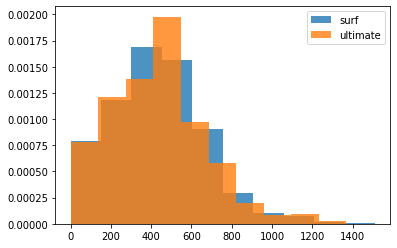

In [19]:
# analyzing customer behaviour with phone call service
plt.hist(surf_users['minutes'], label='surf', alpha=0.8, density=True)
plt.hist(ultimate_users['minutes'], label='ultimate', alpha=0.8, density=True)
plt.legend()
plt.show()

In [20]:
# calculating mean, variance, and standard deviation for text messages sent
print(surf_users['texts'].describe())
print('Variance (surf_users):', surf_users['texts'].var())
print()
print(ultimate_users['texts'].describe())
print('Variance (ultimate_users):', ultimate_users['texts'].var())

count    1573.000000
mean       31.159568
std        33.566717
min         0.000000
25%         3.000000
50%        24.000000
75%        47.000000
max       266.000000
Name: texts, dtype: float64
Variance (surf_users): 1126.7245219504066

count    720.000000
mean      37.551389
std       34.767179
min        0.000000
25%        7.000000
50%       30.000000
75%       61.000000
max      166.000000
Name: texts, dtype: float64
Variance (ultimate_users): 1208.7567435481378


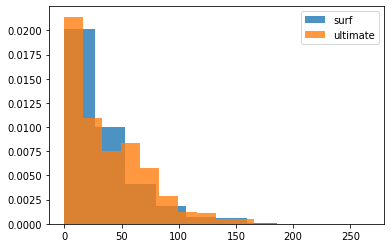

In [21]:
# analyzing customer behaviour with text messaging service
plt.hist(surf_users['texts'], label='surf', alpha=0.8, density=True)
plt.hist(ultimate_users['texts'], label='ultimate', alpha=0.8, density=True)
plt.legend()
plt.show()

In [22]:
# calculating mean, variance, and standard deviation for internet usage
print(surf_users['gb_used'].describe())
print('Variance (surf_users):', surf_users['gb_used'].var())
print()
print(ultimate_users['gb_used'].describe())
print('Variance (ultimate_users):', ultimate_users['gb_used'].var())

count    1573.000000
mean       16.670693
std         7.847522
min         0.000000
25%        12.000000
50%        17.000000
75%        21.000000
max        70.000000
Name: gb_used, dtype: float64
Variance (surf_users): 61.58359983759012

count    720.000000
mean      17.306944
std        7.670108
min        0.000000
25%       13.000000
50%       17.000000
75%       21.000000
max       46.000000
Name: gb_used, dtype: float64
Variance (ultimate_users): 58.830549760469786


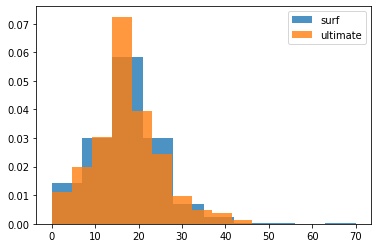

In [23]:
# analyzing customer behaviour with internet service
plt.hist(surf_users['gb_used'], label='surf', alpha=0.8, density=True)
plt.hist(ultimate_users['gb_used'], label='ultimate', alpha=0.8, density=True)
plt.legend()
plt.show()

### Conclusion

Foremost analysis was conducted on individual services (ie. phone call duration, text messages sent, and data usage) between Surf and Ultimate telecom plans and the following were observed:

***phone calls:*** 
On average, users from both Surf and Ultimate make phone calls that last around 430 minutes (~429 minutes, Surf and ~430 minutes, Ultimate). Additionally, there seems to be more Ultimate users that utilize the phone call service than Surf users. There is also a higher chance for an Ultimate user to make a phone call that is between 400-500 minutes, and as for Surf users there is a high chance for phone calls between 300-450 minutes.
 
***text messaging:*** 
On average, Surf users send around 31 text messages and Ultimate users send around 38 text messages. There also seems to be more Ultimate users that utilize the text messaging service than Surf users. The histogram illustrates a higher chance for an Ultimate user to send between 0-20 text messages, and for Surf users there is a high chance people send between 0-25 text messages.
 
***internet (data) usage:*** 
On average, both Surf and Ultimate users use around 17 gb of data. There seems to be more Surf users than Ultimate users, however, there is a higher chance for an Ultimate user to be using between 15-19 gb of data. In contrast, Surf users will most likely use between 15-20 gb of data. 

## Testing hypotheses
1. Is there a difference between the average revenue from users of Ultimate and Surf calling plans? 
2. Does the average revenue from users in NY-NJ area differ from that of the users from other regions?

In [31]:
# calculating mean, variance, and standard deviation for revenue between Surf and Ultimate plans
print(surf_users['revenue'].describe())
print('Variance (surf_users):', surf_users['revenue'].var())
print()
print(ultimate_users['revenue'].describe())
print('Variance (ultimate_users):', ultimate_users['revenue'].var())

count    1573.000000
mean       60.706408
std        55.388042
min        20.000000
25%        20.000000
50%        40.360000
75%        80.360000
max       590.370000
Name: revenue, dtype: float64
Variance (surf_users): 3067.835152293878

count    720.000000
mean      72.313889
std       11.395108
min       70.000000
25%       70.000000
50%       70.000000
75%       70.000000
max      182.000000
Name: revenue, dtype: float64
Variance (ultimate_users): 129.8484855509195


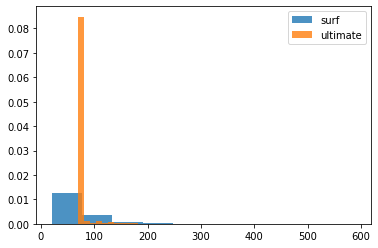

In [30]:
# analyzing revenue between Surf and Ultimate plans
plt.hist(surf_users['revenue'], label='surf', alpha=0.8, density=True)
plt.hist(ultimate_users['revenue'], label='ultimate', alpha=0.8, density=True)
plt.legend()
plt.show()

In [24]:
# Is there a difference between the average revenue from users of Ultimate and Surf calling plans?
alpha = 0.05
results = st.ttest_ind(surf_users['revenue'], ultimate_users['revenue'], equal_var=False, nan_policy='omit')

print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

p-value: 3.17039054811355e-15
We reject the null hypothesis


In [32]:
# calculating mean, variance, and standard deviation for revenue between regions
# making separate datasets from region
nynj_users = users_usage.query('region == "NY-NJ"')
other_users = users_usage.query('region == "other"')

print(nynj_users['revenue'].describe())
print('Variance (nynj_users):', nynj_users['revenue'].var())
print()
print(other_users['revenue'].describe())
print('Variance (other_users):', other_users['revenue'].var())

count    377.000000
mean      59.921353
std       43.537865
min       20.000000
25%       20.000000
50%       51.770000
75%       72.460000
max      280.000000
Name: revenue, dtype: float64
Variance (nynj_users): 1895.5456899204246

count    1916.000000
mean       65.222771
std        47.170414
min        20.000000
25%        24.927500
50%        70.000000
75%        70.000000
max       590.370000
Name: revenue, dtype: float64
Variance (other_users): 2225.0479943518917


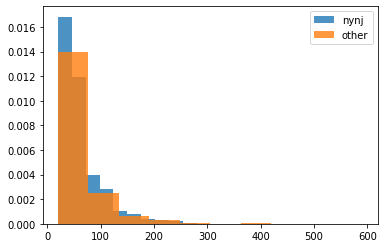

In [33]:
# analyzing revenue between regions
plt.hist(nynj_users['revenue'], label='nynj', alpha=0.8, density=True)
plt.hist(other_users['revenue'], label='other', alpha=0.8, density=True)
plt.legend()
plt.show()

In [26]:
# Does the average revenue from users in NY-NJ area differ from that of the users from other regions?

# hypothesis testing
alpha = 0.05
results = st.ttest_ind(nynj_users['revenue'], other_users['revenue'], equal_var=False, nan_policy='omit')

print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

p-value: 0.03352561588530014
We reject the null hypothesis


### Conclusion

For the first hypothesis test we have the following:

$H_{0}$: The average revenue accrued is equal from users of Ultimate and Surf calling plans
<br>$H_{a}$: The average revenue from users of Ultimate calling plan is not equal to the average revenue from users of Surf calling plan

The null hypothesis usually indicates no change or that the items being compared are equal to each other. The alternative hypothesis would be sensical to be the opposite, which is to indicate a change or that the items being compared are not equal to each other. Thus, the aforementioned hypotheses were formulated to analyze the average revenue from users of *ultimate* and *surf* telecom plans. An alpha value of 0.05 was used since it is the most commonly used statistical significance level.

With a p-value of approximately 3.17e-15 (a very small number), which is less than 0.05, we reject $H_{0}$ and determine that the average revenue from users of Ultimate calling plan is not equal to the average revenue from users of Surf calling plan.

For the second hypothesis test we have the following:

$H_{0}$: The average revenue accrued is not different from users in the NY-NJ area and other regions
<br>$H_{a}$: The average revenue accrued is different from users in the NY-NJ area and other regions

To reiterate, the null hypothesis usually indicates no change or that the items being compared are equal to each other. The alternative hypothesis would be sensical to be the opposite, which is to indicate a change or that the items being compared are not equal to each other. Thus, the aforementioned hypotheses were formulated to analyze the average revenue from users in the NY-NJ area and other regions. An alpha value of 0.05 was used since it is the most commonly used statistical significance level.

With a p-value of approximately 0.034, which is less than 0.05, we reject $H_{0}$ and determine that the average revenue accrued is different from users in the NY-NJ area and other regions.